In [25]:
import requests

#세션 객체 생성
with requests.Session() as session:
    #세션 객체에 웹 브라우저 정보 주입
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    })

    url = "https://data.hossam.kr/py/titanic.json"
    r = session.get(url)

    # HTTP 상태 값이 200이 아닌 경우는 강제로 에러를 발생시켜서 코드의 진행을 중단

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

# JSON 형식의 응답 결과를 딕셔너리로 반환한다.
my_dict = r.json()
my_dict
passengers = my_dict['passengers']
# print(passengers[:2])

total = len(passengers)

survived=0
age = []
for i in passengers:
    if i['survived']==True and i['sex'] =='male':
        survived +=1
        if i['age']:
            age.append(i['age'])
print(age)
rate = survived*100/total
avg_age = sum(age)/len(age)
print("전체 탑승객 %d명 중에서 %0.2f%%의 탑승객만 생존했다" %(total, rate))
print("전체 남자 탑승객 %d명 중에서 평균 나이%d살의 %0.2f%%탑승객만 생존했다" %(total, avg_age,rate))

<Response [200]>
[34, 28, 32, 0.83, 29, 23, 12, 24, 27, 9, 1, 45, 3, 18, 26, 40, 16, 38, 19, 37, 3, 25, 25, 19, 30, 42, 0.92, 45, 2, 3, 25, 36, 21, 39, 3, 44, 32, 28, 4, 34, 52, 49, 29, 48, 25, 9, 26, 29, 36, 32, 8, 17, 22, 32, 62, 36, 32, 60, 49, 35, 27, 42, 20, 80, 32, 48, 56, 50, 20, 31, 36, 27, 31, 35, 42, 48, 27, 35, 31, 6, 0.67, 20, 1, 11, 0.42, 27, 27, 1, 0.83, 32, 51, 4, 26]
전체 탑승객 891명 중에서 12.23%의 탑승객만 생존했다
전체 남자 탑승객 891명 중에서 평균 나이27살의 12.23%탑승객만 생존했다


In [10]:
import pandas as pd
df = pd.DataFrame(my_dict["passengers"])
df

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5 21171,7.2500,None,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2. 3101282,7.9250,None,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,False,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,False,3,"Johnston, Miss. Catherine Helen Carrie",female,NaN,1,2,W.C. 6607,23.4500,None,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
import requests

#세션 객체 생성
with requests.Session() as session:
    #세션 객체에 웹 브라우저 정보 주입
    session.headers.update({
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    })

    url = "https://data.hossam.kr/py/titanic.json"
    r = session.get(url)

    # HTTP 상태 값이 200이 아닌 경우는 강제로 에러를 발생시켜서 코드의 진행을 중단

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

# JSON 형식의 응답 결과를 딕셔너리로 반환한다.
my_dict = r.json()
my_dict
passengers = my_dict['passengers']
# print(passengers[:2])

total = len(passengers)

survived=0
man_survived=0
age = []
for i in passengers:
    if i['survived']==True and i['sex'] =='male':
        man_survived +=1
        if i['age']:
            age.append(i['age'])

for i in passengers:
    if i['survived']==True:
        survived +=1

print(age)
rate = survived*100/total
avg_age = sum(age)/len(age)
print("전체 탑승객 %d명 중에서 %0.2f%%의 탑승객만 생존했다" %(total, rate))
print("전체 살아남은 탑승객 %d명 중에서 남자 탑승객은 평균 나이%d살의 남자 %d명만 생존했다" %(survived, avg_age, man_survived))

<Response [200]>
[34, 28, 32, 0.83, 29, 23, 12, 24, 27, 9, 1, 45, 3, 18, 26, 40, 16, 38, 19, 37, 3, 25, 25, 19, 30, 42, 0.92, 45, 2, 3, 25, 36, 21, 39, 3, 44, 32, 28, 4, 34, 52, 49, 29, 48, 25, 9, 26, 29, 36, 32, 8, 17, 22, 32, 62, 36, 32, 60, 49, 35, 27, 42, 20, 80, 32, 48, 56, 50, 20, 31, 36, 27, 31, 35, 42, 48, 27, 35, 31, 6, 0.67, 20, 1, 11, 0.42, 27, 27, 1, 0.83, 32, 51, 4, 26]
전체 탑승객 891명 중에서 38.38%의 탑승객만 생존했다
전체 살아남은 탑승객 342명 중에서 남자 탑승객은 평균 나이27살의 남자 109명만 생존했다


## 파일 다운로드

In [30]:
import requests

# Jupyter에서 이미지를 출력하는 모듈(Jupyter 전용 내장 라이브러리)
from IPython.display import Image


with requests.Session() as session:
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})

    # 요청할 데이터의 URL
    url = "https://data.hossam.kr/py/sample.png"
    # 바이너리(이진형식) 데이터 가져옴
    r = session.get(url,stream=True)

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

<Response [200]>


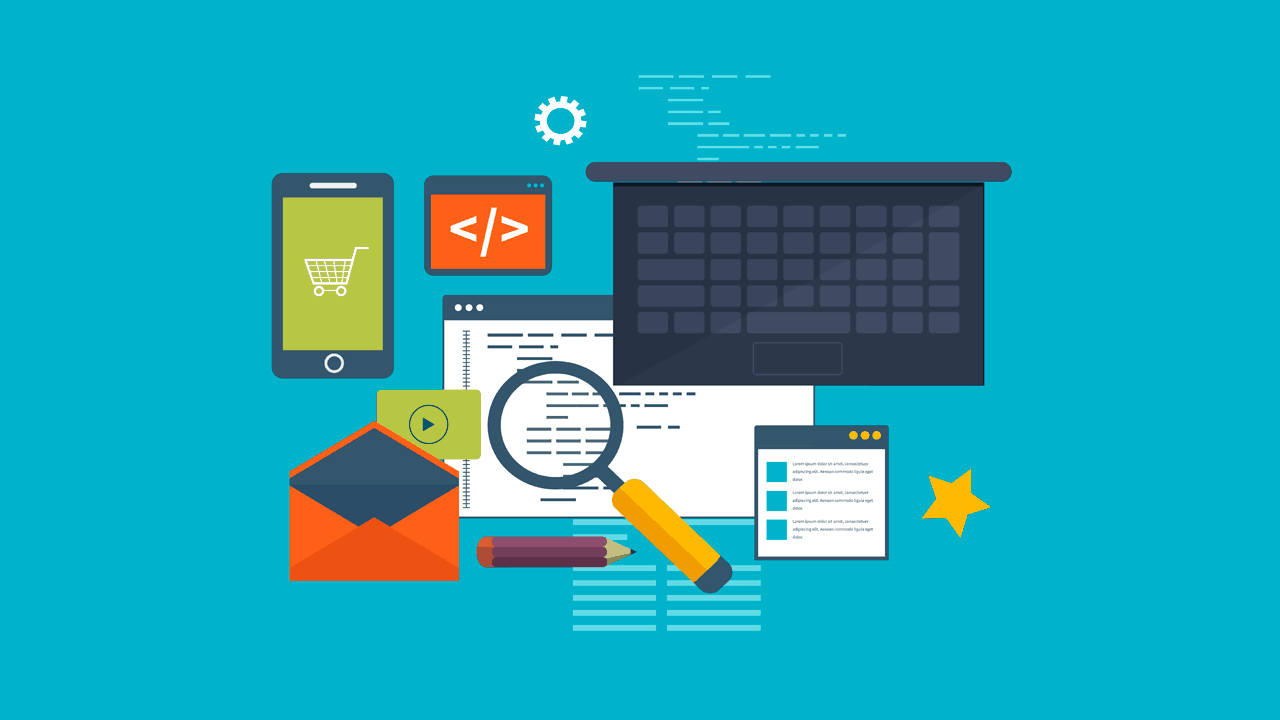

In [31]:
# 인코딩 형식 지정
r.encoding = "utf-8"

# 수신 결과를 파일로 저장
with open("sample.png", "wb") as f:
    f.write(r.raw.read())

#저장된 이미지 파일 출력
Image("sample.png")

## Restful API와의 연동

In [41]:
import requests
from pandas import DataFrame

with requests.Session() as session:
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})

    # 요청할 데이터의 URL
    url = "http://127.0.0.1:9091/departments/202"
    # 바이너리(이진형식) 데이터 가져옴
    r = session.get(url)

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

r.encoding = "utf-8"
my_dict = r.json()
my_dict

<Response [200]>


{'result': {'id': 202,
  'dname': '기계공학과',
  'loc': '공학관',
  'phone': '051-126-4567',
  'email': 'me@myschool.ac.kr',
  'established': 1988,
  'homepage': 'http://machine.myschool.ac.kr'},
 'timestamp': '2025-11-04 15:42:38'}

In [43]:
print("학과번호:", my_dict["result"]["id"])
print("학과이름:", my_dict["result"]["dname"])
print("위치:", my_dict["result"]["loc"])
print("연락처:", my_dict["result"]["phone"])
print("이메일:", my_dict["result"]["email"])
print("설립년도:", my_dict["result"]["established"])
print("홈페이지:", my_dict["result"]["homepage"])

학과번호: 202
학과이름: 기계공학과
위치: 공학관
연락처: 051-126-4567
이메일: me@myschool.ac.kr
설립년도: 1988
홈페이지: http://machine.myschool.ac.kr



### 다중 행 데이터 조회


In [44]:
with requests.Session() as session:
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})

    # 요청할 데이터의 URL
    url = "http://127.0.0.1:9091/departments"
    # 바이너리(이진형식) 데이터 가져옴
    r = session.get(url)

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

r.encoding = "utf-8"
my_dict = r.json()
df = DataFrame(my_dict['result'])
df

<Response [200]>


,id,dname,loc,phone,email
0,101,컴퓨터공학과,공학관,051-123-4567,cs@myschool.ac.kr
1,102,소프트웨어학과,공학관,051-124-4567,media@myschool.ac.kr
2,202,기계공학과,공학관,051-126-4567,me@myschool.ac.kr
3,203,건축학과,건축관,051-127-4567,arch@myschool.ac.kr
4,204,산업디자인학과,디자인관,051-128-4567,id@myschool.ac.kr
5,301,경영학과,경영관,051-129-4567,biz@myschool.ac.kr
6,302,경제학과,경영관,051-130-4567,econ@myschool.ac.kr
7,401,영어영문학과,인문사회관,051-131-4567,eng@myschool.ac.kr
8,402,심리학과,인문사회관,051-132-4567,psy@myschool.ac.kr
9,500,인공지능학과,공학관,051-123-4567,ai@myschool.ac.kr


## 데이터 저장하기 POST 방식

In [ ]:
import requests
from pandas import DataFrame

params = {
    "dname" : "파이썬학과",
    "loc" : "IT융합관",
    "phone" : "052-7788-9900",
    "email" : "python@myschool.ac.kr",
    "established": 2025,
    "homepage": "http://python.myschool.ac.kr"
}

with requests.Session() as session:
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})

    # 요청할 데이터의 URL
    url = "http://127.0.0.1:9091/departments"
    # 바이너리(이진형식) 데이터 가져옴
    r = session.post(url, data=params)

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

r.encoding = "utf-8"
my_dict = r.json()

print("학과번호:", my_dict["result"]["id"])
print("학과이름:", my_dict["result"]["dname"])
print("위치:", my_dict["result"]["loc"])
print("연락처:", my_dict["result"]["phone"])
print("이메일:", my_dict["result"]["email"])
print("설립년도:", my_dict["result"]["established"])
print("홈페이지:", my_dict["result"]["homepage"])

# 저장된 신규 학과의 PK값을 별도로 저장한다. (이후 단계에서 활용하기 위함)
new_pk = my_dict["result"]["id"]

<Response [200]>
학과번호: 510
학과이름: 제육학과
위치: 제육관
연락처: 052-7788-9900
이메일: meatlover@myschool.ac.kr
설립년도: 2025
홈페이지: http://python.myschool.ac.kr


## PUT방식 요청 - 데이터 수정하기

In [46]:
params = {
    "dname" : "인공지능학과",
    "loc" : "IT융합관",
    "phone" : "052-7766-8899",
    "email" : "ai@myschool.ac.kr",
    "established": 2025,
    "homepage": "http://ai.myschool.ac.kr"
}

with requests.Session() as session:
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})

    # 요청할 데이터의 URL
    url = "http://127.0.0.1:9091/departments/%d" % new_pk
    # 바이너리(이진형식) 데이터 가져옴
    r = session.put(url, data=params)

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

r.encoding = "utf-8"
my_dict = r.json()

print("학과번호:", my_dict["result"]["id"])
print("학과이름:", my_dict["result"]["dname"])
print("위치:", my_dict["result"]["loc"])
print("연락처:", my_dict["result"]["phone"])
print("이메일:", my_dict["result"]["email"])
print("설립년도:", my_dict["result"]["established"])
print("홈페이지:", my_dict["result"]["homepage"])

<Response [200]>
학과번호: 509
학과이름: 인공지능학과
위치: IT융합관
연락처: 052-7766-8899
이메일: ai@myschool.ac.kr
설립년도: 2025
홈페이지: http://ai.myschool.ac.kr


## DELETE 방식 요청 - 데이터 삭제하기

In [49]:
with requests.Session() as session:
    session.headers.update({ "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"})

    # 요청할 데이터의 URL
    url = "http://127.0.0.1:9091/departments/%d" % new_pk
    # 바이너리(이진형식) 데이터 가져옴
    r = session.delete(url)

    if r.status_code !=200:
        msg = "[%d Error] %s 에러가 발생함" %(r.status_code, r.reason)
        raise Exception(msg)
    
    print(r)

r.encoding = "utf-8"
my_dict = r.json()
my_dict

<Response [200]>


{'timestamp': '2025-11-04 17:43:31'}